# Suicides in India 
With a population of 1.3 billion, it isn’t surprising that India ranks high in suicides. As a child growing up in India, news of farmers committing suicide to avoid paying debts was common every summer. As the summers grew hotter, these suicide rates kept increasing. The urbanization of India does not seem to have had a positive effect on suicide rates. The government of India has made available [public data](https://data.gov.in/dataset-group-name/accidental-deaths-and-suicides) caused by accidents and suicides starting from the year 1967 to 2015. A [subset of this data is available on Kaggle](https://www.kaggle.com/rajanand/suicides-in-india), with a surprising amount of detail available for the cause of suicides starting from 2001.



In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = DataFrame.from_csv('Suicides in India 2001-2012.csv', index_col = None)
data = data[(data.Total>0) & (~(data.State == 'Total (All India)')) & (~(data.State == 'Total (States)')) & (~(data.State == 'Total (Uts)'))]

In [3]:
data_by_causes = data[data.Type_code == 'Causes']
data_by_means_adopted = data[data.Type_code == 'Means_adopted']
data_by_education_status = data[data.Type_code == 'Education_Status']
data_by_professional_profile = data[data.Type_code == 'Professional_Profile']
data_by_social_status = data[data.Type_code == 'Social_Status']

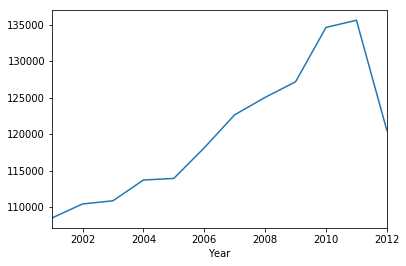

In [4]:
data_by_causes.groupby('Year')['Total'].sum().plot()
pass

## Causes of Suicide
The list of causes reads like a list of triggers for depression, something that might call for a visit to a psychologist or a psychiatrist, and perhaps even a list of life events that occur in a lot of people’s lives (love affairs, divorce, family problems, fall in social reputation, to name a few). Not to trivialize individual situations, but a lot of these causes seem highly preventable. My aim with this dataset is to use it to use patterns in the data to identify the reasons for the rapid rise of suicide rates in India, and find out what can be done to prevent them. 

In [5]:
data_by_causes.Type.value_counts()

Causes Not known                                  3332
Other Causes (Please Specity)                     3065
Family Problems                                   3013
Other Prolonged Illness                           2680
Insanity/Mental Illness                           2572
Love Affairs                                      1697
Poverty                                           1568
Death of Dear Person                              1511
Fall in Social Reputation                         1496
Suspected/Illicit Relation                        1420
Drug Abuse/Addiction                              1406
Unemployment                                      1404
Property Dispute                                  1393
Failure in Examination                            1379
Bankruptcy or Sudden change in Economic           1373
Cancer                                            1233
Professional/Career Problem                       1160
Cancellation/Non-Settlement of Marriage           1116
Paralysis 

In [6]:
aggr_data = DataFrame(data_by_education_status.groupby(['Year','State'])['Total'].sum())

In [7]:
aggr_data_sorted = aggr_data.reset_index().sort_values(['Year','Total'], ascending=False)

In [8]:
top_10_states = data_by_education_status.groupby('State')['Total'].sum().sort_values(ascending=False)[:10].index.values
top_10_states

array(['Maharashtra', 'West Bengal', 'Tamil Nadu', 'Andhra Pradesh',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Gujarat', 'Chhattisgarh',
       'Odisha'], dtype=object)

## Analysis Plan
To identify a cause, I plan to analyze and compare suicide rates to demographic indicators such as literacy rates over time, access to health services, access to the Internet in urban and rural India. Because the data is rich enough that there is a cause associated with most suicide counts, I will be able to localize the cause to a state, year, and age group, and match it with local trends. This will also let me identify at-risk demographic groups in each state.

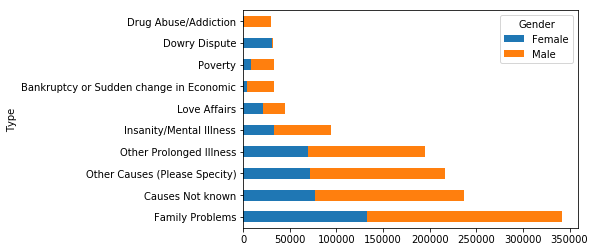

In [9]:
summary_causes_gender = data_by_causes.groupby(['Type','Gender'])['Total'].sum().unstack('Gender')
summary_causes_gender['Total'] = summary_causes_gender.Female + summary_causes_gender.Male
summary_causes_gender.sort_values(by='Total',ascending=False)[['Female','Male']][:10].plot(kind='barh',stacked=True)
pass

In [10]:
summary_causes_agegroup = DataFrame(data_by_causes.groupby(['Age_group','Type'])['Total'].sum())
summary_causes_agegroup = summary_causes_agegroup.reset_index()
summary_causes_agegroup.loc[summary_causes_agegroup.groupby('Age_group')['Total'].idxmax()]

,Age_group,Type,Total
19,0-14,Other Causes (Please Specity),9035
39,15-29,Family Problems,121427
67,30-44,Family Problems,125135
95,45-59,Family Problems,69465
132,60+,Other Prolonged Illness,31082


For example, the states of West Bengal, Maharashtra, Tamil Nadu, and Andhra Pradesh are known to produce large volumes of candidates for competitive examinations, and these states are among the top 5 for the cause of suicide ‘Failure in Examination’. 
Once a trend is identified, it can be used to pinpoint areas in which the government or non-profits can intervene to provide the necessary services. 


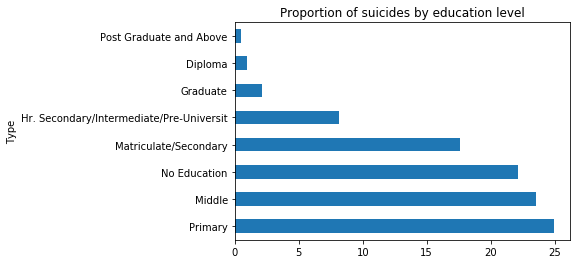

In [15]:
ax = (data_by_education_status.groupby('Type')['Total'].sum()/data_by_education_status['Total'].sum()*100).sort_values(ascending=False).plot(kind='barh')
ax.set_title('Proportion of suicides by education level')
pass

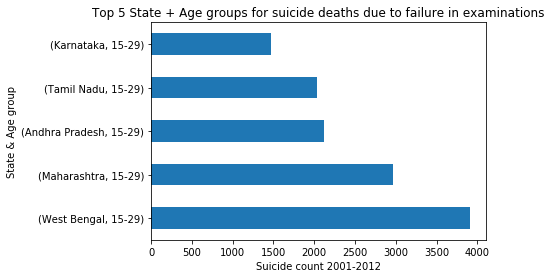

In [16]:
ax = data_by_causes[data_by_causes.Type == 'Failure in Examination'].groupby(['State','Age_group']).Total.sum().sort_values(ascending=False)[:5].plot(kind='barh')
ax.set_xlabel('Suicide count 2001-2012')
ax.set_ylabel('State & Age group')
ax.set_title('Top 5 State + Age groups for suicide deaths due to failure in examinations')
pass